The goal of goal of this notebook is to explore how sampling noise affects weight estimation by playing with some simulated data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

Declare our constants. There are 150000 total fish of normally distributed weights. Every day we sample 1500 fish, and we do this for 100 days

In [2]:
NUM_FISH = 150000
START_WEIGHT_MEAN = 100 #grams
START_WEIGHT_STD = 10 #grams
NUM_DAYS = 100 #days
DAILY_SAMPLE_SIZE = 1500 #fish

Start with a simple case. 
Assume no bias in our sampling. 
Assume the fish are not growing.

Initialize a population with the normally distributed weights.
Conduct sample with replacement daily to estimate the mean weight.
Compare to actual population mean.

Text(0, 0.5, 'Weight (g)')

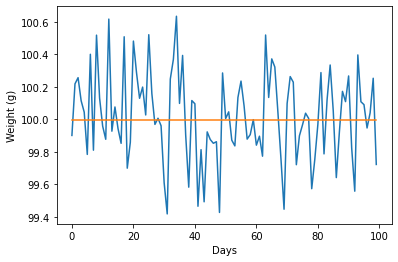

In [3]:
fish_weights = np.zeros(NUM_FISH,)
for fish_index in range(NUM_FISH):
  fish_weights[fish_index] = random.normalvariate(START_WEIGHT_MEAN,START_WEIGHT_STD)

true_mean = np.mean(fish_weights)

sampled_means = np.zeros(NUM_DAYS,)
for sample_index in range(NUM_DAYS):
  sampled_means[sample_index] = np.mean(np.random.choice(fish_weights,size=DAILY_SAMPLE_SIZE))

plt.plot(sampled_means)
plt.plot(np.full((NUM_DAYS,),true_mean))
plt.xlabel('Days')
plt.ylabel('Weight (g)')

The standard deviation of daily sample can be easily calculated using the formula for the [standard error of the mean](https://www.kellogg.northwestern.edu/faculty/weber/jhu/statistics/estimation.htm). In practice, we might have to use the standard deviation measured from the samples to calculate predicted standard error because we won't know the exact standard deviation of the whole population.

In [4]:
predicted_standard_error = START_WEIGHT_STD / np.sqrt(DAILY_SAMPLE_SIZE)
print('predicted standard error: ' + str(predicted_standard_error))

actual_standard_error = np.std(sampled_means)
print('actual standard error: ' + str(actual_standard_error))

predicted standard error: 0.25819888974716115
actual standard error: 0.2694750660760266


The standard error of the mean tells us the relationship between sampling noise and sample size scales with 1/sqrt(# of samples). The sampling noise also scales with on the true standard deviation of the weights.

Averaging the sampled weights over multiple days give the same sampling noise as the sampling all fish in a single day

In [5]:
SMOOTHING_TIME_WINDOW_DAYS = 7
fish_sampled_in_time_window = DAILY_SAMPLE_SIZE * SMOOTHING_TIME_WINDOW_DAYS

#use a boxcar smoothing window / moving average
smoothed_sampled_means = np.convolve(sampled_means, np.ones(SMOOTHING_TIME_WINDOW_DAYS)/SMOOTHING_TIME_WINDOW_DAYS, mode='valid')

smoothed_standard_error = np.std(smoothed_sampled_means)
print('standard error of the mean from 7 day moving average of 1500 daily samples: ' + str(smoothed_standard_error))

predicted_standard_error = START_WEIGHT_STD / np.sqrt(fish_sampled_in_time_window)
print('standard error of the mean from sampling all 7*1500 days worth of fish together: ' + str(predicted_standard_error))

standard error of the mean from 7 day moving average of 1500 daily samples: 0.10679539061108412
standard error of the mean from sampling all 7*1500 days worth of fish together: 0.09759000729485331


In this extremely simple demo without growth rate, we can see how if we wanted to control the sampling noise to a predetermined level (standard error of the mean of ~0.1 g), we can just tune the number of days for smoothing, because it is equivalent to capturing more samples in a day. And more samples just mean the sampling noise scales down by 1/sqrt(# of samples). 

Therefore in a situation where growth rate can be properly modeled, we can reduce the sampling noise down to an acceptable level using this method.